## Import necessary packages

In [203]:
import pandas as pd

In [204]:
import numpy as np

In [205]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [206]:
pip install texthero --user

Note: you may need to restart the kernel to use updated packages.


In [207]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [208]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier


In [209]:
import warnings
warnings.filterwarnings('ignore')

### This dataset consists of 30,000 reviews for more than 200 different products. The reviews and ratings are given by more than 20,000 users. 

In [210]:
df_products=pd.read_csv('sample30.csv')

In [211]:
df_products

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-23T00:00:00.000Z,False,True,5,I got this conditioner with Influenster to try...,Softness!!,NaN,NaN,laurasnchz,Positive
29996,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-27T00:00:00.000Z,False,True,5,"I love it , I received this for review purpose...",I love it,NaN,NaN,scarlepadilla,Positive
29997,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-21T00:00:00.000Z,False,True,5,First of all I love the smell of this product....,Hair is so smooth after use,NaN,NaN,liviasuexo,Positive
29998,AVpfW8y_LJeJML437ySW,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday...",L'oreal Paris,L'or233al Paris Elvive Extraordinary Clay Reba...,2017-01-11T00:00:00.000Z,False,True,5,I received this through Influenster and will n...,Perfect for my oily hair!,NaN,NaN,ktreed95,Positive


## Exploratory Data Analysis for user reviews.

1. char & Word  frequency Analysis

<AxesSubplot:>

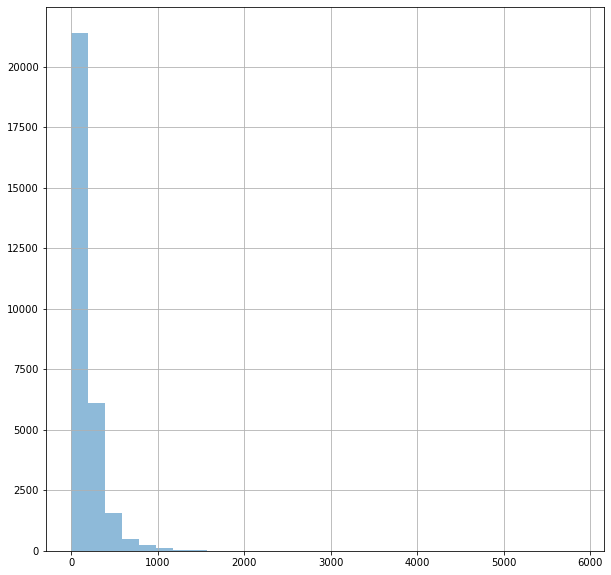

In [212]:
df_products['reviews_text'].str.len().hist(alpha=0.5, figsize=(10, 10),bins=30)

<AxesSubplot:>

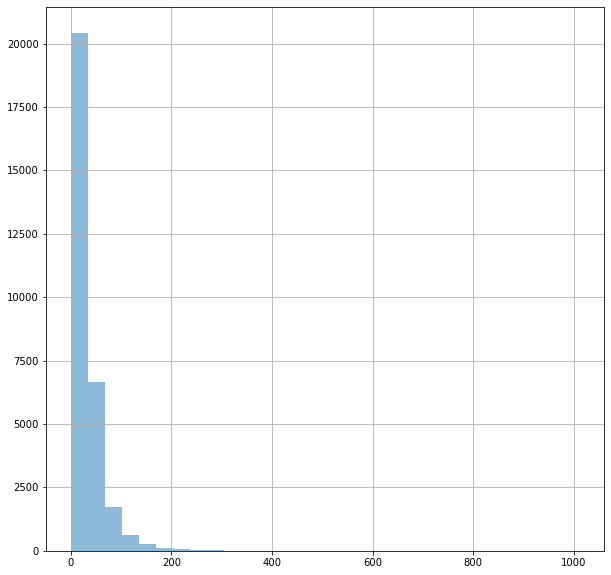

In [213]:
#df_products['reviews_text'].str.split()

df_products['reviews_text'].str.split(' ').map(lambda x: len(x)).hist(alpha=0.5, figsize=(10, 10),bins=30)
#df.hist(alpha=0.5, figsize=(20, 10))

In [214]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

### there are some columns which have missing records: reviews_userCity,reviews_userProvince,reviews_title,reviews_doRecommend,reviews_didPurchase etc

In [215]:
df_products.describe()

,reviews_rating
count,30000.000000
mean,4.483133
std,0.988441
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


## Data Cleaning
### 1. remove missing data rows from user_sentiment and reviews_username

### column user_sentiment and reviews_username has some missing data, these are very less in number so we can remove whole rows in data.

In [216]:
df_products[df_products['user_sentiment'].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,NaN,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,NaN,mamad,7.87E+11,NaN


In [217]:
df_products[df_products['reviews_text'].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment


In [218]:
df_products[df_products['reviews_username'].isna()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
1453,AVpe_N91LJeJML43z4jD,Way Basics,"Home,Kids' Home,Girls' Room,Girls' Room Furnit...",Way Basics,Way Basics 3-Shelf Eco Narrow Bookcase Storage...,2011-07-08T00:00:00Z,NaN,NaN,4,"We like this shelf, and found it relatively ea...",Way Basics 3-Shelf Storage Unit in Espresso Wo...,NaN,NaN,NaN,Positive
1531,AVpe_y-I1cnluZ0-bmvh,Yes to Carrots,"Personal Care,Bath, Shower & Soap,Body Wash & ...",Yes To Inc.,Yes To Carrots Nourishing Body Wash,2011-10-30T05:00:00Z,NaN,NaN,5,I'm very sensitive to fragrance - most give me...,Wonderful,NaN,NaN,NaN,Positive
1532,AVpe_y-I1cnluZ0-bmvh,Yes to Carrots,"Personal Care,Bath, Shower & Soap,Body Wash & ...",Yes To Inc.,Yes To Carrots Nourishing Body Wash,2013-07-19T05:00:00Z,NaN,NaN,5,Not all shower gels leave their smell after yo...,Smell stays on your skin,NaN,NaN,NaN,Positive
1787,AVpe38Uy1cnluZ0-YuJR,Target.com Use Only,"Movies, Music & Books,Movies,Music,All MGM Tit...",MGM (Video & DVD),Clambake (dvd),NaN,NaN,NaN,2,"Not one of Elvis's best movies, but it has som...",Purely for Elvis fans...,NaN,NaN,NaN,Positive
1792,AVpe38Uy1cnluZ0-YuJR,Target.com Use Only,"Movies, Music & Books,Movies,Music,All MGM Tit...",MGM (Video & DVD),Clambake (dvd),NaN,NaN,NaN,4,"Like every 1966-67 Elvis movie, you have prett...","If you like EP, you'll love this one",NaN,NaN,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26489,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2013-06-11T00:00:00Z,NaN,NaN,1,Have used this several times on my 7 month old...,Wouldn't recommend for babies with sensitive skin,NaN,NaN,NaN,Positive
26497,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2014-06-15T00:00:00Z,NaN,NaN,1,My daughter has really sensitive skin. I appli...,Did not work at all.,NaN,NaN,NaN,Positive
26619,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2015-03-12T03:15:19.000Z,NaN,True,5,This is the first sunscreen I am able to use o...,Solved A Long Term Problem For Me!,NaN,NaN,NaN,Positive
26633,AVpfPPkEilAPnD_xX3cP,Aveeno,"Personal Care,Sun Care,Featured Brands,Health ...",Aveeno Baby,Aveeno Baby Continuous Protection Lotion Sunsc...,2014-01-11T00:00:00Z,NaN,NaN,5,This goes on smoothly and does not flake. My s...,Good all over and all-day protection.,NaN,NaN,NaN,Positive


In [219]:
df_products_cleaned=df_products.dropna(subset=['user_sentiment'],axis=0)

In [220]:
df_products_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29999 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29999 non-null  object
 1   brand                 29999 non-null  object
 2   categories            29999 non-null  object
 3   manufacturer          29858 non-null  object
 4   name                  29999 non-null  object
 5   reviews_date          29953 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27429 non-null  object
 8   reviews_rating        29999 non-null  int64 
 9   reviews_text          29999 non-null  object
 10  reviews_title         29809 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  169 non-null    object
 13  reviews_username      29936 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [221]:
df_products_cleaned=df_products_cleaned.dropna(subset=['reviews_username'],axis=0)

In [222]:
df_products_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29936 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29936 non-null  object
 1   brand                 29936 non-null  object
 2   categories            29936 non-null  object
 3   manufacturer          29795 non-null  object
 4   name                  29936 non-null  object
 5   reviews_date          29896 non-null  object
 6   reviews_didPurchase   15931 non-null  object
 7   reviews_doRecommend   27395 non-null  object
 8   reviews_rating        29936 non-null  int64 
 9   reviews_text          29936 non-null  object
 10  reviews_title         29747 non-null  object
 11  reviews_userCity      1900 non-null   object
 12  reviews_userProvince  166 non-null    object
 13  reviews_username      29936 non-null  object
 14  user_sentiment        29936 non-null  object
dtypes: int64(1), object(14)
memory usage

### 2. Remove duplicate reviews from dataframes 

In [223]:
df_products_cleaned=df_products_cleaned.drop_duplicates(subset=['reviews_text'])


In [224]:
df_products_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27227 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    27227 non-null  object
 1   brand                 27227 non-null  object
 2   categories            27227 non-null  object
 3   manufacturer          27086 non-null  object
 4   name                  27227 non-null  object
 5   reviews_date          27188 non-null  object
 6   reviews_didPurchase   14209 non-null  object
 7   reviews_doRecommend   25161 non-null  object
 8   reviews_rating        27227 non-null  int64 
 9   reviews_text          27227 non-null  object
 10  reviews_title         27042 non-null  object
 11  reviews_userCity      1415 non-null   object
 12  reviews_userProvince  69 non-null     object
 13  reviews_username      27227 non-null  object
 14  user_sentiment        27227 non-null  object
dtypes: int64(1), object(14)
memory usage

### 3. keeping  those columns only which are useful

In [225]:
# filtering out columns which are not useful 
#id, name, reviews_rating, reviews_text, user_sentiment, reviews_username are useful
df_products_cleaned_filtered=df_products_cleaned[['id','name','reviews_rating', 'reviews_text', 'user_sentiment', 'reviews_username']]

### lets see smallest reviews quality if it is junk or valid

In [226]:
df_products_cleaned_filtered['no_of_char_review_text']=df_products_cleaned_filtered['reviews_text'].str.len()

In [227]:
df_products_cleaned_filtered.sort_values(by=['no_of_char_review_text'],ascending=True)

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text
27110,AVpfrfHF1cnluZ0-pRai,Care Free Curl Gold Instant Activator,5,Ok,Positive,ccole1222,2
26651,AVpfPPkEilAPnD_xX3cP,Aveeno Baby Continuous Protection Lotion Sunsc...,5,OK,Positive,byziz,2
6322,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",4,...,Negative,choosezmom,3
15521,AVpf5olc1cnluZ0-tPrO,Chester's Cheese Flavored Puffcorn Snacks,5,Yum,Negative,drummy,3
3600,AVpe6n2_LJeJML43yOgE,Tresemme Kertatin Smooth Infusing Conditioning,4,good,Positive,zozo0o,4
...,...,...,...,...,...,...,...
22000,AVpfNfEMLJeJML434uf-,Heiress (dvd),5,The Heiress is William Wyler's screen adaptati...,Positive,lyle stevens,3132
22002,AVpfNfEMLJeJML434uf-,Heiress (dvd),5,THE HEIRESS is a surprisingly complex drama of...,Positive,martin asiner,3392
1788,AVpe38Uy1cnluZ0-YuJR,Clambake (dvd),2,There are basically four criteria by which I j...,Positive,eric carr-tune night creature,3851
4408,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,5,"First, a disclaimer of sorts . Im a long-term,...",Positive,jan714,5664


###  one word reviews are also useful as we can see some examples above:- ok,yum,good etc

### 4. more text clean by using texthero module: 
       (i) lowercasing of text 
       (ii) removing white spaces 
       (iii) removing stopwords 

In [228]:
import re
import string

import texthero as hero

## text hero is library capable of doing cleaning of text 

from texthero import preprocessing
custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics,preprocessing.remove_stopwords
                   
                  ]
df_products_cleaned_filtered['reviews_text_clean'] = hero.clean(df_products_cleaned_filtered['reviews_text'], custom_pipeline)
df_products_cleaned_filtered['reviews_text_clean'] = [review.replace('{','') for review in df_products_cleaned_filtered['reviews_text_clean']]
df_products_cleaned_filtered['reviews_text_clean'] = [review.replace('}','') for review in df_products_cleaned_filtered['reviews_text_clean']]
df_products_cleaned_filtered['reviews_text_clean'] = [review.replace('(','') for review in df_products_cleaned_filtered['reviews_text_clean']]
df_products_cleaned_filtered['reviews_text_clean'] = [review.replace(')','') for review in df_products_cleaned_filtered['reviews_text_clean']]



In [229]:

df_products_cleaned_filtered.head()

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Positive,joshua,201,love album. ' good. hip hop side curre...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Positive,dorothy w,62,good flavor. review collected part promot...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Positive,dorothy w,12,good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Negative,rebecca,696,read reviews looking buying one coup...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Negative,walker557,132,husband bought gel us. gel caused irritati...


In [230]:
df_products_cleaned_filtered.head(5)

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Positive,joshua,201,love album. ' good. hip hop side curre...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Positive,dorothy w,62,good flavor. review collected part promot...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Positive,dorothy w,12,good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Negative,rebecca,696,read reviews looking buying one coup...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Negative,walker557,132,husband bought gel us. gel caused irritati...


### 5. lemmatize the reviews_text 

In [231]:
from nltk.stem import WordNetLemmatizer 

In [232]:
import re, nltk, spacy, string

In [233]:
import en_core_web_sm


In [234]:
nlp=en_core_web_sm.load()

In [235]:
def lemmatize(sent):
    lemmatize_text=''
    sent=nlp(sent)
    for token in sent:
        lemmatize_text+=token.lemma_+' '        
    return lemmatize_text
    
    

In [236]:
df_products_cleaned_filtered['reviews_text_lemmatize']=df_products_cleaned_filtered['reviews_text_clean'].apply(lambda x:lemmatize(x))

In [237]:
df_products_cleaned_filtered.head()

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean,reviews_text_lemmatize
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Positive,joshua,201,love album. ' good. hip hop side curre...,love album . ' good . hip hop side ...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Positive,dorothy w,62,good flavor. review collected part promot...,good flavor . review collect part pro...
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Positive,dorothy w,12,good flavor.,good flavor .
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Negative,rebecca,696,read reviews looking buying one coup...,read review look buy one couple...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Negative,walker557,132,husband bought gel us. gel caused irritati...,husband buy gel -PRON- . gel cause irr...


### 6. now we will only keep noun and adjectives and adverbs  because they keep most of sentiment with entities 

In [238]:
from textblob import TextBlob

def pos_tag(text):
    try:
        return TextBlob(text).tags
    except:
        return None

def get_adjectives(text):
    blob = TextBlob(text)
    #print('blob',blob)
    return ' '.join([ word for (word,tag) in blob.tags if tag == "NN" or tag == "JJ" 
                     or tag == "JJR"  or tag == "JJS" or tag == "RB" or tag == "RBR" or tag == "RBS" ] )

df_products_cleaned_filtered["reviews_text_lemmatize_POS_removed"] =  df_products_cleaned_filtered.apply(lambda x: get_adjectives(x['reviews_text_lemmatize']), axis=1)

In [239]:
df_products_cleaned_filtered.head()

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean,reviews_text_lemmatize,reviews_text_lemmatize_POS_removed
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Positive,joshua,201,love album. ' good. hip hop side curre...,love album . ' good . hip hop side ...,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Positive,dorothy w,62,good flavor. review collected part promot...,good flavor . review collect part pro...,good flavor review part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Positive,dorothy w,12,good flavor.,good flavor .,good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Negative,rebecca,696,read reviews looking buying one coup...,read review look buy one couple...,review couple lubricant ultimately disappoint ...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Negative,walker557,132,husband bought gel us. gel caused irritati...,husband buy gel -PRON- . gel cause irr...,husband gel -PRON- gel cause irritation burn s...


In [240]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

In [241]:
stopwords=set(STOPWORDS)

## Exploratory data analysis
### 1. Word Cloud



### Now lets generate word cloud for positive reviews 

In [242]:
def generate_word_cloud(senti_type,df):
    text=''
    for review in df[df['user_sentiment']==senti_type]['reviews_text_lemmatize_POS_removed']:
        review=review.lower()
        text += " ".join(review.split())+" "
    wordcld = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,max_words=40,
                min_font_size = 10).generate(text)
    plt.figure(figsize=(8,8),facecolor = None)
    plt.imshow(wordcld)
    plt.axis('off')
    plt.tight_layout(pad = 0)
    plt.show()
    
    
                          
     

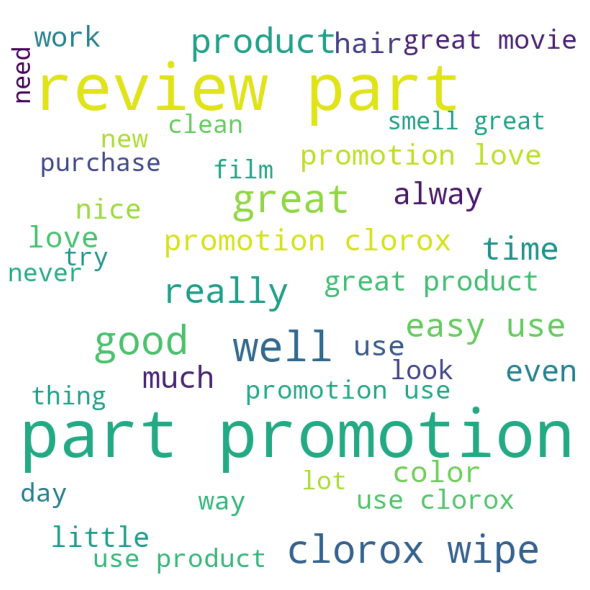

In [243]:
generate_word_cloud('Positive',df_products_cleaned_filtered)

### word cloud for  Negative sentiments

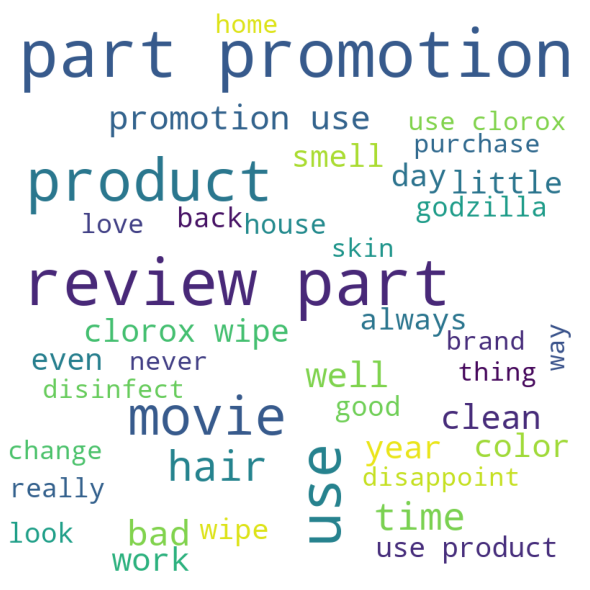

In [244]:
generate_word_cloud('Negative',df_products_cleaned_filtered)

### 2. n_gram analysis

In [245]:
def get_top_n_gram(corpus,gram_threshold, n=None):
    vec = CountVectorizer(ngram_range=(gram_threshold, gram_threshold), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    #print(words_freq )
    
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]



In [246]:
from sklearn.feature_extraction.text import CountVectorizer

In [247]:
get_top_n_gram(df_products_cleaned_filtered['reviews_text_lemmatize_POS_removed'],2,n=30)

[('review promotion', 7378),
 ('clorox wipe', 1767),
 ('easy use', 1192),
 ('use clorox', 798),
 ('use product', 769),
 ('great product', 751),
 ('great movie', 695),
 ('smell great', 540),
 ('good movie', 529),
 ('love use', 515),
 ('godzilla movie', 509),
 ('product use', 496),
 ('work great', 456),
 ('use wipe', 448),
 ('movie great', 442),
 ('lip shimmer', 435),
 ('product review', 420),
 ('clean review', 412),
 ('clorox product', 386),
 ('kitchen bathroom', 368),
 ('wipe clean', 368),
 ('receive product', 356),
 ('year old', 350),
 ('use clean', 348),
 ('use review', 332),
 ('collect promotion', 327),
 ('movie good', 319),
 ('smell good', 295),
 ('clean disinfect', 295),
 ('wipe easy', 293)]

In [248]:
get_top_n_gram(df_products_cleaned_filtered['reviews_text_lemmatize_POS_removed'],1,n=30)

[('use', 10029),
 ('great', 8203),
 ('review', 8031),
 ('product', 7949),
 ('promotion', 7723),
 ('movie', 7609),
 ('good', 5745),
 ('clean', 5427),
 ('wipe', 4912),
 ('love', 4057),
 ('clorox', 3604),
 ('hair', 3402),
 ('easy', 3129),
 ('smell', 2967),
 ('time', 2561),
 ('really', 2471),
 ('work', 2316),
 ('godzilla', 2117),
 ('year', 1963),
 ('color', 1712),
 ('bathroom', 1600),
 ('old', 1574),
 ('look', 1529),
 ('house', 1457),
 ('watch', 1415),
 ('lip', 1394),
 ('new', 1393),
 ('day', 1313),
 ('conditioner', 1301),
 ('price', 1247)]

In [249]:
get_top_n_gram(df_products_cleaned_filtered['reviews_text_lemmatize_POS_removed'],3,n=30)

[('use clorox wipe', 495),
 ('clean review promotion', 406),
 ('product review promotion', 345),
 ('use review promotion', 321),
 ('receive product free', 210),
 ('review collect promotion', 208),
 ('love use clorox', 185),
 ('wipe review promotion', 180),
 ('great review promotion', 178),
 ('wipe easy use', 167),
 ('opinion review promotion', 160),
 ('house review promotion', 155),
 ('clorox wipe easy', 155),
 ('product easy use', 151),
 ('use product year', 144),
 ('clorox wipe clean', 144),
 ('disinfect review promotion', 128),
 ('love review promotion', 126),
 ('clorox review promotion', 123),
 ('love clorox product', 123),
 ('bathroom review promotion', 119),
 ('clorox wipe use', 114),
 ('time review promotion', 111),
 ('mess review promotion', 107),
 ('home review promotion', 106),
 ('easy use review', 104),
 ('great product use', 95),
 ('smell review promotion', 92),
 ('use clorox product', 87),
 ('cocoa lip shimmer', 84)]

## Feature extraction: 

1. TF-IDF vectorization

In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [251]:
vectorizer=TfidfVectorizer()
x=vectorizer.fit_transform(df_products_cleaned_filtered['reviews_text_lemmatize_POS_removed'])

In [252]:
vectorizer.get_feature_names_out()

array(['00', '10', '1007', ..., 'zucchetta', 'zucchini', 'zyrtec'],
      dtype=object)

In [253]:
print(x.shape)

(27227, 12562)


In [254]:
from sklearn.model_selection import train_test_split

In [255]:
y=df_products_cleaned_filtered['user_sentiment']

In [256]:
# although we have only two target variable and we could simply repalce those to 1 and 0 
#5, but lets use LabelEncoder to keep habit to using it
from sklearn import preprocessing

le = preprocessing.LabelEncoder()


In [257]:
le.fit(y)

LabelEncoder()

In [258]:
df_products_cleaned_filtered['user_sentiment_encoded']= le.transform(y)

In [259]:
df_products_cleaned_filtered.head()

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean,reviews_text_lemmatize,reviews_text_lemmatize_POS_removed,user_sentiment_encoded
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,i love this album. it's very good. more to the...,Positive,joshua,201,love album. ' good. hip hop side curre...,love album . ' good . hip hop side ...,love album good hip hop side current pop sound...,1
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor. This review was collected as part...,Positive,dorothy w,62,good flavor. review collected part promot...,good flavor . review collect part pro...,good flavor review part promotion,1
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,Good flavor.,Positive,dorothy w,12,good flavor.,good flavor .,good flavor,1
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,I read through the reviews on here before look...,Negative,rebecca,696,read reviews looking buying one coup...,read review look buy one couple...,review couple lubricant ultimately disappoint ...,0
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,My husband bought this gel for us. The gel cau...,Negative,walker557,132,husband bought gel us. gel caused irritati...,husband buy gel -PRON- . gel cause irr...,husband gel -PRON- gel cause irritation burn s...,0


In [276]:
y=df_products_cleaned_filtered['user_sentiment_encoded']

### lets split data in train and test

In [278]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [279]:
y_train.value_counts()

1    16870
0     2188
Name: user_sentiment_encoded, dtype: int64

In [280]:
y_test.value_counts()

1    7303
0     866
Name: user_sentiment_encoded, dtype: int64

In [281]:
df_products_cleaned_filtered['user_sentiment'].value_counts()

Positive    24173
Negative     3054
Name: user_sentiment, dtype: int64

##  class imbalance handling

### we can see above classes are highly imbalanced and positive class is 7 time bigger then negative class. lets apply different  techniques to handle this.   

1. smote
2. oversampling 
3. under sampling

In [282]:
# lets use smote to generate more data for minor class 
smt = SMOTE(random_state=42, k_neighbors=1)
X_SMOTE, y_SMOTE = smt.fit_resample(X_train, y_train)


In [283]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [284]:
# now minor class has 8000 records 
y_over.value_counts()

1    16870
0     8435
Name: user_sentiment_encoded, dtype: int64

In [285]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [286]:
y_under.value_counts()

1    4376
0    2188
Name: user_sentiment_encoded, dtype: int64

In [289]:
def print_confusion_metrics(actual,predicted):
    c_matrix = metrics.confusion_matrix(actual,predicted)

    accuracy= metrics.accuracy_score(actual,predicted)
    precision=metrics.precision_score(actual,predicted)
    recall=metrics.recall_score(actual,predicted)
    f1_score=metrics.f1_score(actual,predicted)

    print('Test Score with', 'features', c_matrix)
    print('precision score',precision)
    print('recall',recall)
    print('f1_score',f1_score)
    
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix, display_labels = [False, True])

    cm_display.plot()
    plt.show()


Test Score with features [[ 150  716]
 [  37 7266]]
precision score 0.91029817088449
recall 0.9949335889360537
f1_score 0.9507360157016683


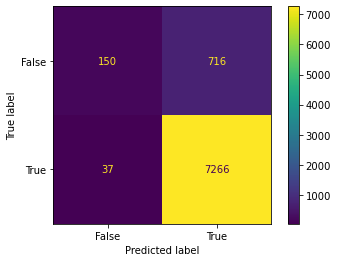

In [290]:

lgr_model = LogisticRegression(random_state=42).fit(X_train, y_train)
y_test_predicted = lgr_model.predict(X_test)
print_confusion_metrics(y_test,y_test_predicted )



Test Score with features [[ 690  176]
 [ 845 6458]]
precision score 0.9734700030147724
recall 0.8842941257017664
f1_score 0.926741766520772


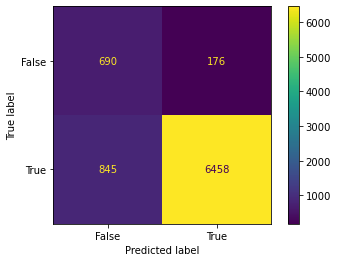

In [291]:
lgr_model_smote = LogisticRegression(random_state=42).fit(X_SMOTE, y_SMOTE)
y_test_predicted = lgr_model_smote.predict(X_test)
print_confusion_metrics(y_test,y_test_predicted )



Test Score with features [[ 631  235]
 [ 528 6775]]
precision score 0.9664764621968617
recall 0.9277009448171984
f1_score 0.9466918186264235


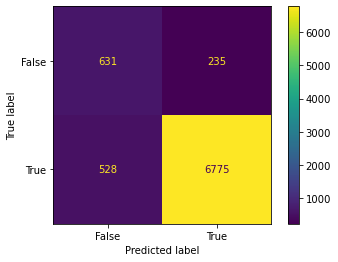

In [292]:
lgr_model_over = LogisticRegression(random_state=42).fit(X_over, y_over)
y_test_predicted = lgr_model_over.predict(X_test)
print_confusion_metrics(y_test,y_test_predicted )



Test Score with features [[ 621  245]
 [ 576 6727]]
precision score 0.964859437751004
recall 0.9211283034369437
f1_score 0.9424868651488616


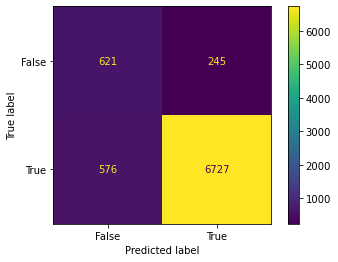

In [293]:
lgr_model_under = LogisticRegression(random_state=42).fit(X_under, y_under)
y_test_predicted = lgr_model_under.predict(X_test)
print_confusion_metrics(y_test,y_test_predicted )



### we have tried 3 random sampling technique to overcome class imbalance , with oversampling we are getting decent precision and recall so lets use same technique for other models also

### without imbalance technique we are getting huge recall but less precision means we are getting false positives 


| technique                              | precision  | recall |  F1   |   |
|----------------------------------------|------------|--     -|---    |---|
| smote                                  | 0.9734     | 0.8842 |0.9267 |   |
| oversampling                           | 0.9667     | 0.9275 |0.9467 |   |
| under sampling                         | 0.9634     | 0.9227 |0.9426 |   |
|without any imbalance technique         | 0.9102     | 0.9949 |0.9507 |   |

### Naive based model 

Test Score with features [[ 231  635]
 [ 211 7092]]
precision score 0.9178206289633751
recall 0.9711077639326304
f1_score 0.9437125748502995


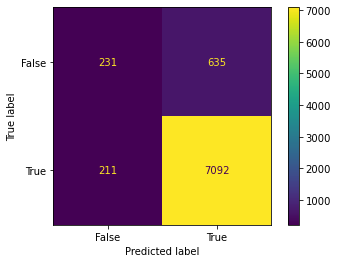

In [294]:
from sklearn.naive_bayes import MultinomialNB

model_multinomial = MultinomialNB()
model_multinomial.fit(X_over, y_over)
y_test_predicted_multinomial=model_multinomial.predict(X_test)
print_confusion_metrics(y_test,y_test_predicted_multinomial )

### Rendom Forest Classifier 

Test Score with features [[ 584  282]
 [ 541 6762]]
precision score 0.9599659284497445
recall 0.9259208544433795
f1_score 0.9426360911688856


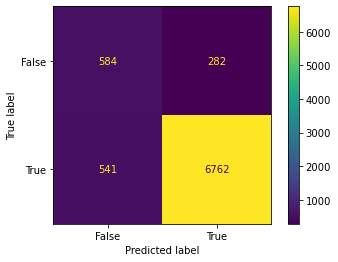

In [295]:
clf = RandomForestClassifier( random_state=42)
clf.fit(X_under, y_under)
y_test_predicted_rf=clf.predict(X_test)
print_confusion_metrics(y_test,y_test_predicted_rf)

## Lets compare all three classifier scores
| technique                             | precision  | recall |  F1   |   |
|---------------------------------------|------------|--     -|---    |---|
| LogisticRegression                    | 0.9667     | 0.9275 |0.9467 |   |
| Naive based                           | 0.9182     | 0.9732 |0.9449 |   |
| Rendom Forest                         | 0.9599     | 0.9259 |0.9426 |   |


In [298]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(lgr_model_over, open(filename, 'wb'))

## Product Recommendation 

- User user based recommandation 

In [299]:
#unique rating given by customer 
df_products_cleaned_filtered['reviews_rating'].unique()

# there is no data which has not given rating so there is no na value

array([5, 1, 3, 4, 2], dtype=int64)

In [300]:
#lets split train test on product data


In [301]:
train,test=train_test_split(df_products_cleaned_filtered,test_size=0.30,random_state=42)

In [302]:
train.head(5)

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean,reviews_text_lemmatize,reviews_text_lemmatize_POS_removed,user_sentiment_encoded
16943,AVpf9pzn1cnluZ0-uNTM,"Lundberg Wehani Rice, 25lb",5,Love this rice!,Positive,byhelga van reypen,15,love rice!,love rice !,rice,1
7925,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,Last thing I use on my kitchen countertops eve...,Positive,sbtraveler,151,last thing use kitchen countertops every ni...,last thing use kitchen countertop every n...,last thing use countertop night bed clean kitc...,1
10704,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,So convenient! I don't have to pull out lots o...,Positive,queeine,140,convenient! ' pull lots cleaning supplie...,convenient ! ' pull lot cleaning su...,convenient pull lot supply great job review pa...,1
11227,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,"As the first time parent of a newborn, I am co...",Positive,opie2,376,"first time parent newborn, constantly wo...","first time parent newborn , constantl...",first time parent newborn constantly germ anyt...,1
29771,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,It is imperative to use this conditioner with ...,Positive,jasminemarin94,274,imperative use conditioner mask shampoo...,imperative use conditioner mask sh...,imperative use conditioner mask complete proce...,1


In [303]:
train.shape

(19058, 11)

In [304]:
##lets create dummy data on train which will be used for ignoring during prediction  

In [305]:
train_dummy=train.copy()

In [306]:
train_dummy['reviews_rating'] = train_dummy['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [307]:
train_dummy.head()

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean,reviews_text_lemmatize,reviews_text_lemmatize_POS_removed,user_sentiment_encoded
16943,AVpf9pzn1cnluZ0-uNTM,"Lundberg Wehani Rice, 25lb",0,Love this rice!,Positive,byhelga van reypen,15,love rice!,love rice !,rice,1
7925,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,0,Last thing I use on my kitchen countertops eve...,Positive,sbtraveler,151,last thing use kitchen countertops every ni...,last thing use kitchen countertop every n...,last thing use countertop night bed clean kitc...,1
10704,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,0,So convenient! I don't have to pull out lots o...,Positive,queeine,140,convenient! ' pull lots cleaning supplie...,convenient ! ' pull lot cleaning su...,convenient pull lot supply great job review pa...,1
11227,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,0,"As the first time parent of a newborn, I am co...",Positive,opie2,376,"first time parent newborn, constantly wo...","first time parent newborn , constantl...",first time parent newborn constantly germ anyt...,1
29771,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,0,It is imperative to use this conditioner with ...,Positive,jasminemarin94,274,imperative use conditioner mask shampoo...,imperative use conditioner mask sh...,imperative use conditioner mask complete proce...,1


In [308]:
# train data needs to be converted in pivot table/
train.reset_index()

,index,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean,reviews_text_lemmatize,reviews_text_lemmatize_POS_removed,user_sentiment_encoded
0,16943,AVpf9pzn1cnluZ0-uNTM,"Lundberg Wehani Rice, 25lb",5,Love this rice!,Positive,byhelga van reypen,15,love rice!,love rice !,rice,1
1,7925,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,Last thing I use on my kitchen countertops eve...,Positive,sbtraveler,151,last thing use kitchen countertops every ni...,last thing use kitchen countertop every n...,last thing use countertop night bed clean kitc...,1
2,10704,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,So convenient! I don't have to pull out lots o...,Positive,queeine,140,convenient! ' pull lots cleaning supplie...,convenient ! ' pull lot cleaning su...,convenient pull lot supply great job review pa...,1
3,11227,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,"As the first time parent of a newborn, I am co...",Positive,opie2,376,"first time parent newborn, constantly wo...","first time parent newborn , constantl...",first time parent newborn constantly germ anyt...,1
4,29771,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,5,It is imperative to use this conditioner with ...,Positive,jasminemarin94,274,imperative use conditioner mask shampoo...,imperative use conditioner mask sh...,imperative use conditioner mask complete proce...,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19053,23875,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,4,Great action. Story was pretty good as well. I...,Positive,preacherman,101,great action. story pretty good well. reall...,great action . story pretty good well . ...,great action story pretty good well really god...,1
19054,5474,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),5,The 100 is like a fine wine: it's a show that ...,Positive,jworden,1062,100 like fine wine: ' show gets better ...,100 like fine wine : ' show get wel...,fine wine show well age first episode typical ...,1
19055,875,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2...,5,"Although I received a free sample, I didn't ne...",Positive,ladyw,158,"although received free sample, ' need one. ...","although receive free sample , ' need on...",receive free sample use windex year still work...,1
19056,16660,AVpf7LysilAPnD_xkm9G,Cuisinart174 Electric Juicer - Stainless Steel...,3,I'm satisfied with this purchase for the price...,Positive,mazu,140,"' satisfied purchase price paid , strai...","' satisfied purchase price pay , s...",satisfied purchase price pay strainer hard cle...,1


In [309]:
df_pivot=train.pivot_table(index='reviews_username',columns='name',values='reviews_rating').fillna(1)

In [310]:
train_dummy['reviews_rating'] = train_dummy['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [311]:
train_dummy=train_dummy.pivot_table(index='reviews_username',columns='name',values='reviews_rating').fillna(1)

In [312]:
train_dummy.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [313]:
from sklearn.metrics.pairwise import pairwise_distances

In [314]:
user_corr=1 -pairwise_distances(df_pivot,metric='cosine')

In [315]:
user_corr[np.isnan(user_corr)]= 0

In [316]:
user_corr.shape

(17667, 17667)

In [317]:
df_pivot=train.pivot_table(index='reviews_username',columns='name',values='reviews_rating')

In [318]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [319]:
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [320]:
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [321]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 6.49209972, 0.        , ..., 7.51843514, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [322]:
user_predicted_ratings.shape

(17667, 255)

In [323]:
user_final_rating = np.multiply(user_predicted_ratings,train_dummy)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
00sab00,0.0,6.4921,0.0,0.0,0.0,0.0,0.0,0.0,5.088669,0.0,...,0.0,0.0,2.5,3.680009,0.0,0.0,0.0,7.518435,0.0,0.0
01impala,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
02deuce,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
0325home,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [402]:
user_input = '0325home'


In [403]:
final_rating_by_user = user_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
final_rating_by_user

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest          0.0
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)    0.0
Ogx Conditioner, Hydrating Teatree Mint                                0.0
Olay Moisturizing Lotion For Sensitive Skin                            0.0
Olay Regenerist Deep Hydration Regenerating Cream                      0.0
Name: 0325home, dtype: float64

In [337]:
user_final_rating.shape

(17667, 255)

In [338]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(916, 11)

In [339]:
common.head()

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean,reviews_text_lemmatize,reviews_text_lemmatize_POS_removed,user_sentiment_encoded
27540,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5,Planes: Fire & Rescue is better than the first...,Positive,mr301,64,planes: fire & rescue better first. great a...,plane : fire & rescue well first . great ...,plane fire rescue well first great animation,1
15535,AVpf5olc1cnluZ0-tPrO,Chester's Cheese Flavored Puffcorn Snacks,5,Very cheesy and melt in your mouth!,Negative,jeanne,35,cheesy melt mouth!,cheesy melt mouth !,cheesy mouth,0
18374,AVpfGuDrLJeJML432fDz,Pleasant Hearth Diamond Fireplace Screen - Esp...,1,Received in timely manner and the box was comp...,Positive,nick,205,received timely manner box completely inta...,receive timely manner box completely in...,timely manner box completely intact screen box...,1
27845,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5,Disney did not disappoint....fun story of triu...,Positive,iluvbbtechstuff,84,disney disappoint....fun story triumph!! gr...,disney disappoint .... fun story triumph ...,disney disappoint fun story triumph great kid ...,1
2536,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),5,This movie is hilarious as cramp will enjoy wi...,Positive,vickie,56,movie hilarious cramp enjoy friends,movie hilarious cramp enjoy friend,movie hilarious cramp enjoy friend,1


In [340]:
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [341]:
user_correlation_df = pd.DataFrame(user_correlation)

In [342]:
df_subtracted.head(1)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [343]:
user_correlation_df['reviews_username'] = df_subtracted.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17657,17658,17659,17660,17661,17662,17663,17664,17665,17666
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00sab00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [344]:
common.head(1)

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean,reviews_text_lemmatize,reviews_text_lemmatize_POS_removed,user_sentiment_encoded
27540,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5,Planes: Fire & Rescue is better than the first...,Positive,mr301,64,planes: fire & rescue better first. great a...,plane : fire & rescue well first . great ...,plane fire rescue well first great animation,1


In [345]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [346]:
user_correlation_df_1.shape

(673, 17667)

In [347]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [348]:
user_correlation_df_3 = user_correlation_df_2.T

In [349]:
user_correlation_df_3.head()

,123charlie,1witch,37f5p,aaron,abbey,abby,acg1,adma2,adriana,adrienne,...,wiseman378,wizard,wolf,wolvarine,wonderwoman,wonster67,woody,xavier,xstr8edgex,zippy
reviews_username,,,,,,,,,,,,,,,,,,,,,
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
37f5p,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
aaron,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
abbey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [350]:
user_correlation_df_3.shape

(673, 673)

In [351]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 3.55341801, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [352]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [353]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [354]:
common_user_predicted_ratings.head(2)

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,...,Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [355]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [356]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [357]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [358]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.3582517351037438


- Item item Based recommandation

In [359]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,1.11E+24,11111111aaaaaaaaaaaaaaaaa,11677j,1234,...,zoso60,zotox,zout22389,zozo0o,zpalma,zubb,zulaa118,zxcsdfd,zxjki,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [360]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [361]:
df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02deuce,0325home,06stidriver,1.11E+24,11111111aaaaaaaaaaaaaaaaa,11677j,1234,...,zoso60,zotox,zout22389,zozo0o,zpalma,zubb,zulaa118,zxcsdfd,zxjki,zzz1127
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [362]:
from sklearn.metrics.pairwise import pairwise_distances

In [363]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00695277  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.00695277  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [364]:
#Filtering the correlation only for which the value is greater than 0. (Positively correlated)
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [365]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.03278241e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.72868166e-02, 0.00000000e+00, ...,
        1.04416263e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.07460096e-02, 0.00000000e+00, ...,
        0.00000000e+00, 3.87400342e-03, 1.74558002e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.29038049e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.31615220e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.63230439e-05, 0.00000000e+00, 0.00000000e+00]])

In [366]:
item_predicted_ratings.shape

(17667, 255)

In [367]:
train_dummy.shape

(17667, 255)

In [368]:
item_final_rating = np.multiply(item_predicted_ratings,train_dummy)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.020328,0.000000,0.000000
00sab00,0.0,0.017287,0.0,0.0,0.0,0.0,0.0,0.0,0.027365,0.0,...,0.0,0.0,0.000000,0.018133,0.0,0.0,0.0,0.010442,0.000000,0.000000
01impala,0.0,0.050746,0.0,0.0,0.0,0.0,0.0,0.0,0.010416,0.0,...,0.0,0.0,0.000000,0.002249,0.0,0.0,0.0,0.000000,0.003874,0.001746
02deuce,0.0,0.067661,0.0,0.0,0.0,0.0,0.0,0.0,0.013888,0.0,...,0.0,0.0,0.000000,0.002999,0.0,0.0,0.0,0.000000,0.005165,0.002327
0325home,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.001284,0.0,...,0.0,0.0,0.010125,0.000000,0.0,0.0,0.0,0.000033,0.000000,0.000000


In [369]:
### Finding the top 5 recommendation for the *user*



In [399]:
# Take the user ID as input
user_input = '0325home'


In [401]:
# Recommending the Top 5 products to the user.
final_rating_by_user = item_final_rating.loc[user_input].sort_values(ascending=False)[0:5]
final_rating_by_user

name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         5.000000
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    0.020231
Nature's Path Chunky Chocolate Peanut Chewy Granola Bars                          0.019607
Clorox Disinfecting Bathroom Cleaner                                              0.014079
Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz                        0.011979
Name: 0325home, dtype: float64

In [397]:
item_final_rating.shape

(17667, 255)

# Evaluation - Item Item

In [377]:
common =  test[test.name.isin(train.name)]
common.shape

(8146, 11)

In [378]:
common.head(4)

,id,name,reviews_rating,reviews_text,user_sentiment,reviews_username,no_of_char_review_text,reviews_text_clean,reviews_text_lemmatize,reviews_text_lemmatize_POS_removed,user_sentiment_encoded
10984,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,Great for cleaning the bathroom!! I really lov...,Positive,cindy1834,215,great cleaning bathroom!! really love cl...,great clean bathroom ! ! really love ...,great clean bathroom really clorox product use...,1
10519,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,I keep them all around the house! You never kn...,Positive,trudi100,101,keep around house! never know spill ha...,keep around house ! never know spi...,house never spill clean smell,1
5598,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),3,It's an alright action movie to watch once and...,Positive,clubbed,54,' alright action movie watch awhile.,' alright action movie watch awhile .,alright action movie watch awhile,1
17592,AVpfBpnEilAPnD_xTUBx,"All,bran Complete Wheat Flakes, 18 Oz.",5,Finally a healthy cereal that's actually healt...,Positive,dru1313,224,finally healthy cereal ' actually healthy. ra...,finally healthy cereal ' actually healthy . ...,finally healthy cereal actually healthy raisin...,1


In [379]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [380]:
common_item_based_matrix.shape

(193, 7823)

In [381]:
item_correlation_df = pd.DataFrame(item_correlation)

In [382]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [383]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [384]:
list_name = common.name.tolist()

In [385]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]


In [386]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [387]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.45766827e-02, 5.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.98086494e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.29038049e-05, 3.29038049e-05, 1.53431519e-02],
       [6.45667236e-03, 0.00000000e+00, 6.00932648e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.90930003e-03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [389]:
common_item_predicted_ratings.shape

(193, 7823)

In [390]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [391]:
##The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.


In [392]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [393]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [394]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [395]:
y.shape

(193, 7823)

In [396]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5859266890296753


### below are rmse score for each technique: based on below score, user-user based has lowest rmse score , so we will selecting this for product recommendation 


| technique                              | rmse-score |   |   |   |
|----------------------------------------|------------|---|---|---|
| user-user collaborative recommendation | 2.3582     |   |   |   |
| item-item collaborative recommendation | 3.5859     |   |   |   |
|                                        |            |   |   |   |

### lets pickle user-user data frame for prediction module 


In [398]:
pickle.dump(user_final_rating, open('user_final_prediction_df', 'wb'))
